In [1]:
# replot the omf stats from radstats/cnvstats
# initial built: 2025/03/21

import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

import pandas as pd

In [3]:
root_rad = '/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/gsidiag/ush/radstats/data/omfstats/'
root_cnv = '/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/gsidiag/ush/cnvstats/data'

#expstr = 'full_CTRL-full_CTRL_noinf-full_clr_cld_low-full_low_sym_tri'
#expstr = 'full_CTRL-full_CTRL_noinf-full_only_clr-full_clr_cld-full_sym_tri-full_low_sym_tri'
#expstr = 'full_CTRL-full_only_clr-full_clr_cld'
#expstr = 'full_clr_cld-full_sym_tri-full_low_sym_tri'
expstr = 'full_CTRL-full_CTRL_noinf'
exps   = expstr.split('-')

expref = exps[0]
exptest = exps[1]

reflabel = 'CTRL'
testlabel = 'NOINF'

instr_rad = ['iasi','mhs','ahi']
instr_cnv = ['q','t','amv']

df={}; wn={};
for ins in instr_rad:
    csvfn = f'{root_rad}/{expstr}/radstats_{ins}.csv'
    
    if ins in ('iasi','cris'):
        wnmap = f'{root_rad}/{expstr}/wnmap_{ins}.csv'
        wn[ins] = pd.read_csv(wnmap)
        
    df[ins] = pd.read_csv(csvfn)

for ins in instr_cnv:
    csvfn = f'{root_cnv}/{expstr}/cnvstats_{ins}.csv'      
    df[ins] = pd.read_csv(csvfn)    
    
#color=['black','blue','red']
color=['blue','red']

In [4]:
df.keys()

dict_keys(['iasi', 'mhs', 'ahi', 'q', 't', 'amv'])

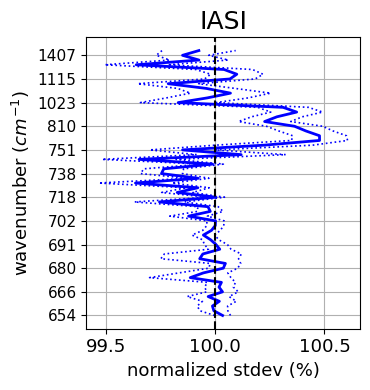

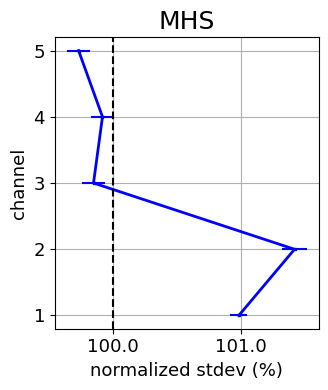

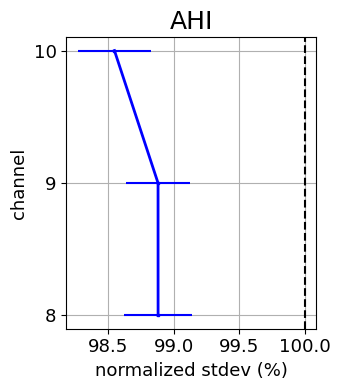

In [9]:
# Plot radstats:

e=0

save_fig = True
fig_dir = f'/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/python_codes/figures/omf_stats_replot/{expstr}/'

if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)
    print(f"Directory '{fig_dir}' created.")


for ins in instr_rad:
    
    if ins in ('iasi', 'cris'):
        dftmp = df[ins]
        dftmp[dftmp['region']=='GLB']

        def get_wavenumbers(channels, df):
            channel_to_wavenumber = dict(zip(df['channel'], df['wvnum']))
            return [int(channel_to_wavenumber[ch]) for ch in channels if ch in channel_to_wavenumber]

        chnum = dftmp[dftmp['region']=='GLB']['channel']
        plt_yticks = get_wavenumbers(chnum, wn[ins])
        plt_yaxis  = np.arange(len(plt_yticks))
        plt_omf    = dftmp[dftmp['region']=='GLB'][f'meanstd_{exptest}']
        plt_ci     = dftmp[dftmp['region']=='GLB'][f'ci_{exptest}']

        plt_interval = 3
        label_interval = 5

        plt_yticks = plt_yticks[::plt_interval]
        plt_yaxis  = plt_yaxis [::plt_interval]
        plt_omf    = plt_omf   [::plt_interval]
        plt_ci     = plt_ci    [::plt_interval]
        
        ### Plot Section 
        fig,ax = plt.subplots(figsize=(3.8,4))

        ax.plot(plt_omf, plt_yaxis, color=color[e], linewidth=2)
        ax.plot(plt_omf-plt_ci, plt_yaxis, linestyle=':', color=color[e], linewidth=1.2)
        ax.plot(plt_omf+plt_ci, plt_yaxis, linestyle=':', color=color[e], linewidth=1.2)
        ax.axvline(100,linestyle='--', color='black')
        ax.tick_params(axis='both', which='major', labelsize=13)
        ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
        ax.set_yticks(plt_yaxis[::label_interval], plt_yticks[::label_interval], fontsize=11)
        ax.set_xlabel('normalized stdev (%)',fontsize=13)
        ax.set_ylabel(r'wavenumber ($cm^{-1}$)',fontsize=13)
        ax.grid(True)
        ax.set_title(f'{ins.upper()}', fontsize=18)
        plt.tight_layout()
        
        if save_fig:
            plt.savefig(f"{fig_dir}/norm_stdev_{ins}.png", dpi=300, bbox_inches='tight')
        
    else:
        dftmp = df[ins]

        plt_yticks = dftmp[dftmp['region']=='GLB']['channel']
        plt_yaxis  = np.arange(len(plt_yticks))

        plt_omf    = dftmp[dftmp['region']=='GLB'][f'meanstd_{exptest}']
        plt_ci     = dftmp[dftmp['region']=='GLB'][f'ci_{exptest}']
        
        ### Plot Section 
        fig,ax = plt.subplots(figsize=(3.5,4))

        ax.errorbar(plt_omf, plt_yaxis, xerr=plt_ci, fmt='s', color=color[e], ecolor=color[e], capsize=0, linestyle='None', markersize=1.5)
        ax.plot(plt_omf, plt_yaxis, color=color[e], linewidth=2)
        ax.axvline(100,linestyle='--', color='black')
        ax.tick_params(axis='both', which='major', labelsize=13)
        ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
        ax.set_yticks(plt_yaxis, plt_yticks, fontsize=13)
        ax.set_xlabel('normalized stdev (%)',fontsize=13)
        ax.set_ylabel('channel',fontsize=13)
        ax.grid(True)
        ax.set_title(f'{ins.upper()}', fontsize=18)
        plt.tight_layout()
        
        if save_fig:
            plt.savefig(f"{fig_dir}/norm_stdev_{ins}.png", dpi=300, bbox_inches='tight')
        


/tmp/ipykernel_1317161/4033092314.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt_yticks.iloc[-1]= 1025


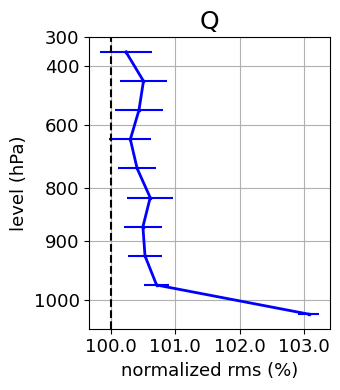

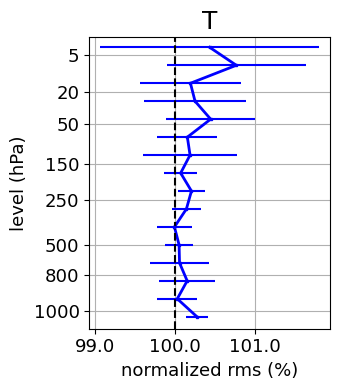

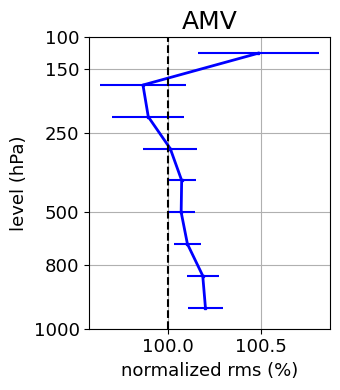

In [8]:
# Plot cnvstats:

e=0

save_fig = True
fig_dir = f'/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/python_codes/figures/omf_stats_replot/{expstr}/'

if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)
    print(f"Directory '{fig_dir}' created.")
    
for ins in instr_cnv:
    
    dftmp = df[ins]

    plt_yticks = dftmp[dftmp['region']=='GLB']['pltlev']
    plt_yticks.iloc[-1]= 1025
    plt_yaxis  = np.arange(len(plt_yticks))

    
    plt_omf    = dftmp[dftmp['region']=='GLB'][f'meanrms_{exptest}']
    plt_ci     = dftmp[dftmp['region']=='GLB'][f'ci_rms_{exptest}']

    ### Plot Section 
    fig,ax = plt.subplots(figsize=(3.5,4))

    ax.errorbar(plt_omf, plt_yaxis, xerr=plt_ci, fmt='s', color=color[e], ecolor=color[e], capsize=0, linestyle='None', markersize=1.5)
    ax.plot(plt_omf, plt_yaxis, color=color[e], linewidth=2)
    ax.invert_yaxis()
    ax.axvline(100,linestyle='--', color='black')
    ax.tick_params(axis='both', which='major', labelsize=13)        
    ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
    ax.set_xlabel('normalized rms (%)',fontsize=13)
    ax.set_ylabel('level (hPa)',fontsize=13)
    ax.grid(True)
    if ins == 'q':
        target_y = [1000, 900, 800, 600, 400, 300]
        interpolated_x = np.interp(target_y, plt_yticks, plt_yaxis)
        ax.set_ylim(interpolated_x[0]+1,interpolated_x[-1])
        
    elif ins == 't':
        target_y = [1000, 800, 500, 250, 150, 50, 20, 5]
        interpolated_x = np.interp(target_y, plt_yticks, plt_yaxis)
        ax.set_ylim(interpolated_x[0]+1,interpolated_x[-1]-1)

    elif ins == 'amv':
        target_y = [1000, 800, 500, 250, 150, 100]
        interpolated_x = np.interp(target_y, plt_yticks, plt_yaxis)
        ax.set_ylim(interpolated_x[0],interpolated_x[-1]+1)

    ax.set_yticks(interpolated_x, [round(tmp) for tmp in target_y], fontsize=13)
    ax.set_title(f'{ins.upper()}', fontsize=18)
    plt.tight_layout()
    if save_fig:
        plt.savefig(f"{fig_dir}/norm_rms_{ins}.png", dpi=300, bbox_inches='tight')

In [13]:
plt_yticks

0     8
1     9
2    10
Name: channel, dtype: int64

In [ ]:
    dftmp = df['mhs']

    plt_yticks = dftmp[dftmp['region']=='GLB']['channel']
    plt_yaxis  = np.arange(len(plt_yticks))

    plt_omf    = dftmp[dftmp['region']=='GLB'][f'meanstd_{exptest}']
    plt_ci     = dftmp[dftmp['region']=='GLB'][f'ci_{exptest}']



In [ ]:
fig,ax = plt.subplots(figsize=(4,3.5))

e=1
ax.errorbar(plt_omf, plt_yaxis, xerr=plt_ci, fmt='s', color=color[e], ecolor=color[e], capsize=3, linestyle='None', markersize=1.5)
ax.plot(plt_omf, plt_yaxis, color=color[e], linewidth=2)
ax.axvline(100,linestyle='--', color='black')
ax.tick_params(axis='both', which='major', labelsize=13)
ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
ax.set_yticks(plt_yaxis, plt_yticks, fontsize=13)
ax.set_xlabel('normalized stdev (%)',fontsize=13)
ax.set_ylabel('channel',fontsize=13)
ax.grid(True)
ax.set_title('MHS', fontsize=15)

In [ ]:
dftmp = df['iasi']
dftmp[dftmp['region']=='GLB']

def get_wavenumbers(channels, df):
    channel_to_wavenumber = dict(zip(df['channel'], df['wvnum']))
    return [int(channel_to_wavenumber[ch]) for ch in channels if ch in channel_to_wavenumber]


chnum = dftmp[dftmp['region']=='GLB']['channel']
plt_yticks = get_wavenumbers(chnum, wn['iasi'])
plt_yaxis  = np.arange(len(plt_yticks))
plt_omf    = dftmp[dftmp['region']=='GLB'][f'meanstd_{exptest}']
plt_ci     = dftmp[dftmp['region']=='GLB'][f'ci_{exptest}']

plt_interval = 4
label_interval = 3

plt_yticks = plt_yticks[::plt_interval]
plt_yaxis  = plt_yaxis [::plt_interval]
plt_omf    = plt_omf   [::plt_interval]
plt_ci     = plt_ci    [::plt_interval]


color=['black','blue','red']

In [ ]:
fig,ax = plt.subplots(figsize=(4,3.5))

e=1
ax.plot(plt_omf, plt_yaxis, color=color[e], linewidth=2)
ax.plot(plt_omf-plt_ci, plt_yaxis, linestyle=':', color=color[e], linewidth=1.2)
ax.plot(plt_omf+plt_ci, plt_yaxis, linestyle=':', color=color[e], linewidth=1.2)
ax.axvline(100,linestyle='--', color='black')
ax.tick_params(axis='both', which='major', labelsize=13)
ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
ax.set_yticks(plt_yaxis[::label_interval], plt_yticks[::label_interval], fontsize=11)
ax.set_xlabel('normalized stdev (%)',fontsize=13)
ax.set_ylabel(r'wavenumber ($cm^{-1}$)',fontsize=13)
ax.grid(True)
ax.set_title('IASI', fontsize=15)

In [ ]:
plt_yticks

In [ ]:
def get_wavenumbers(channels, df):
    channel_to_wavenumber = dict(zip(df['channel'], df['wvnum']))
    return [channel_to_wavenumber[ch] for ch in channels if ch in channel_to_wavenumber]

wavenumber = get_wavenumbers(chn ,wn['iasi'])

In [ ]:
wavenumber

In [ ]:
# replot omf stats for selected channels:


plt_var1 = -dftmp['amsua'][f'bias_{expref}']
plt_var2 = -dftmp['amsua'][f'bias_{exptest}']

bar_height = 0.3

save_fig = False
fig_dir = f'/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/python_codes/figures/rad_stats/{expstr}/'

if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)
    print(f"Directory '{fig_dir}' created.")


fig = plt.figure(figsize=(8,3))
ax1 = fig.add_subplot(1, 2, 1)  # Add subplot at position 1
ax2 = fig.add_subplot(1, 2, 2)  # Add subplot at position 1

x = np.arange(len(plt_chs))

ax1.barh(x + bar_height/2, plt_var1, height=bar_height*0.8, label=f'{reflabel}', color='black')
ax1.barh(x - bar_height/2, plt_var2, height=bar_height*0.8, label=f'{testlabel}', color='blue')

ax1.set_xlabel(r'mean(F-O) [K]', fontsize=15)
ax1.set_yticks([r for r in range(len(plt_chs))], plt_chs, fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=13)
ax1.set_xlim([-1.0,0.5])
ax1.set_ylim([-0.8, len(plt_chs)-0.2])
ax1.set_ylabel('channel',fontsize=15)
ax1.grid(True)
ax1.legend(fontsize=10, loc='upper left')
ax1.set_title('AMSUA', fontsize=15)



plt_var1 = -dftmp['atms'][f'bias_{expref}']
plt_var2 = -dftmp['atms'][f'bias_{exptest}']


ax2.barh(x + bar_height/2, plt_var1, height=bar_height*0.8, label=f'{reflabel}', color='black')
ax2.barh(x - bar_height/2, plt_var2, height=bar_height*0.8, label=f'{testlabel}', color='blue')

ax2.set_xlabel(r'mean(F-O) [K]', fontsize=15)
ax2.set_yticks([r for r in range(len(plt_chs))], plt_chs, fontsize=14)
#ax4.yaxis.tick_right()
ax2.tick_params(axis='both', which='major', labelsize=13)
ax2.set_xlim([-1.0,0.5])
ax2.set_ylim([-0.8, len(plt_chs)-0.2])
ax2.set_ylabel('channel',fontsize=15)
ax2.grid(True)
ax2.legend(fontsize=10, loc='upper left')
ax2.set_title('ATMS', fontsize=15)

plt.tight_layout()

if save_fig:
    plt.savefig(f"{fig_dir}/window_channels_bias.png", dpi=300, bbox_inches='tight')


In [ ]:
df['ahi']

In [ ]:
wn['iasi']